In [1]:
# Description: This program uses an artificial recurrent neural network called Long Short Term Memory (LSTM) 
#to predict the closing stock price of a corporation (Apple Inc.) using the past 60 day stock price.

In [2]:
!pip install pandas-datareader

In [3]:
#Import the libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

Using TensorFlow backend.
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1

In [29]:
#Get the stock quote 
df = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2019-12-17') 
#Show the data 
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.669562
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.737653
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.879066
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,13.013701
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.993060
...,...,...,...,...,...,...
2019-12-11,67.775002,67.125000,67.202499,67.692497,78756800.0,67.112915
2019-12-12,68.139999,66.830002,66.945000,67.864998,137310400.0,67.283928
2019-12-13,68.824997,67.732498,67.864998,68.787498,133587600.0,68.198540


In [30]:
df.shape

(2003, 6)

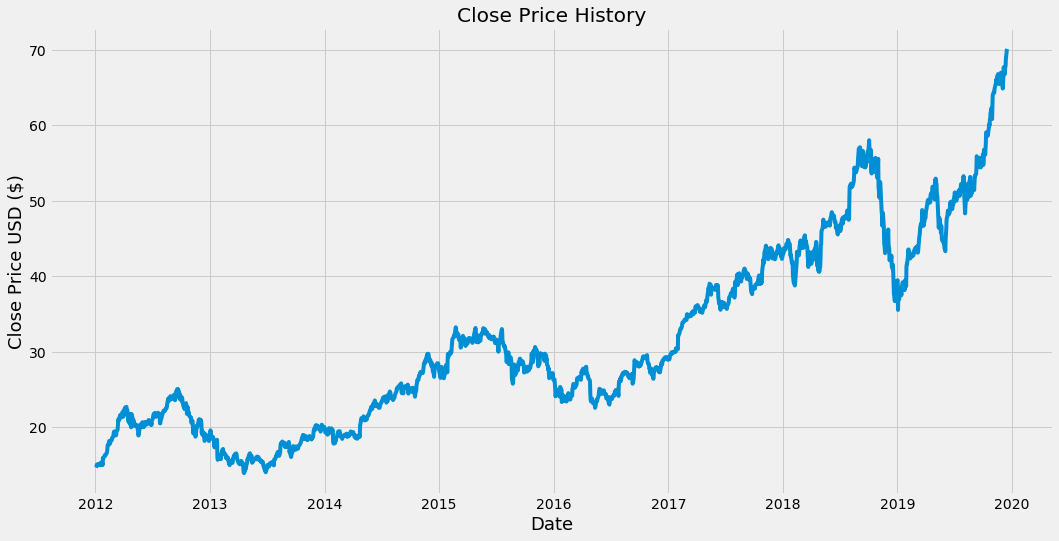

In [31]:
#Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.show()

In [32]:
#Create a new dataframe with only the 'Close' column
data = df.filter(['Close'])
#Converting the dataframe to a numpy array
dataset = data.values
#Get /Compute the number of rows to train the model on
training_data_len = math.ceil( len(dataset) *.8) 

In [33]:
dataset

array([[14.6867857 ],
       [14.76571369],
       [14.92964268],
       ...,
       [68.78749847],
       [69.96499634],
       [70.10250092]])

In [34]:
#Scale the all of the data to be values between 0 and 1 
scaler = MinMaxScaler(feature_range=(0, 1)) 
scaled_data = scaler.fit_transform(dataset)


In [35]:
scaled_data

array([[0.01316509],
       [0.01457063],
       [0.01748985],
       ...,
       [0.97658263],
       [0.99755134],
       [1.        ]])

In [36]:
#Create the scaled training data set 
train_data = scaled_data[0:training_data_len  , : ]
#Split the data into x_train and y_train data sets
x_train=[]
y_train = []
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])

In [41]:
print(len(train_data))

1603


In [37]:
print(train_data[,0])

0.01748984839134482


In [38]:
#Convert x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [40]:
print(y_train)

[0.13949272 0.13293563 0.14507041 ... 0.58926183 0.58164901 0.58939538]


In [12]:
#Reshape the data into the shape accepted by the LSTM
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [13]:
#Build the LSTM network model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

W0119 20:41:38.888180 33488 deprecation_wrapper.py:119] From c:\users\user\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:68: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0119 20:41:38.979512 33488 deprecation_wrapper.py:119] From c:\users\user\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:507: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0119 20:41:38.995501 33488 deprecation_wrapper.py:119] From c:\users\user\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:3831: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [14]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

W0119 20:41:41.373349 33488 deprecation_wrapper.py:119] From c:\users\user\appdata\local\programs\python\python37\lib\site-packages\keras\optimizers.py:757: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [15]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

W0119 20:41:42.210269 33488 deprecation.py:323] From c:\users\user\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0119 20:41:43.168798 33488 deprecation_wrapper.py:119] From c:\users\user\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:976: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0119 20:41:43.278964 33488 deprecation_wrapper.py:119] From c:\users\user\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:963: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.



Epoch 1/1
1543/1543 [==============================] - 88s 57ms/step - loss: 6.9144e-04


In [16]:
#Test data set
test_data = scaled_data[training_data_len - 60: , : ]
#Create the x_test and y_test data sets
x_test = []
y_test =  dataset[training_data_len : , : ] #Get all of the rows from index 1603 to the rest and all of the columns (in this case it's only column 'Close'), so 2003 - 1603 = 400 rows of data
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [47]:
y_test

array([[46.74750137],
       [46.57749939],
       [46.90750122],
       [46.79000092],
       [47.09000015],
       [47.03749847],
       [47.14500046],
       [46.97499847],
       [46.875     ],
       [46.71749878],
       [47.56000137],
       [47.95750046],
       [48.32749939],
       [48.49499893],
       [48.36500168],
       [47.92499924],
       [47.80749893],
       [48.06999969],
       [47.67499924],
       [47.70000076],
       [47.20999908],
       [47.18500137],
       [46.42250061],
       [46.625     ],
       [46.36500168],
       [46.22999954],
       [45.54249954],
       [46.10749817],
       [46.04000092],
       [46.375     ],
       [46.27750015],
       [46.79499817],
       [45.97999954],
       [46.34999847],
       [46.99250031],
       [47.64500046],
       [47.58750153],
       [46.97000122],
       [47.75749969],
       [47.83250046],
       [47.72750092],
       [47.86249924],
       [47.59999847],
       [47.97000122],
       [47.86000061],
       [47

In [17]:
#Convert x_test to a numpy array 
x_test = np.array(x_test)

In [18]:
#Reshape the data into the shape accepted by the LSTM
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [19]:
#Getting the models predicted price values
predictions = model.predict(x_test) 
predictions = scaler.inverse_transform(predictions)#Undo scaling

In [20]:
#Calculate/Get the value of RMSE
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

1.3709268051537555

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


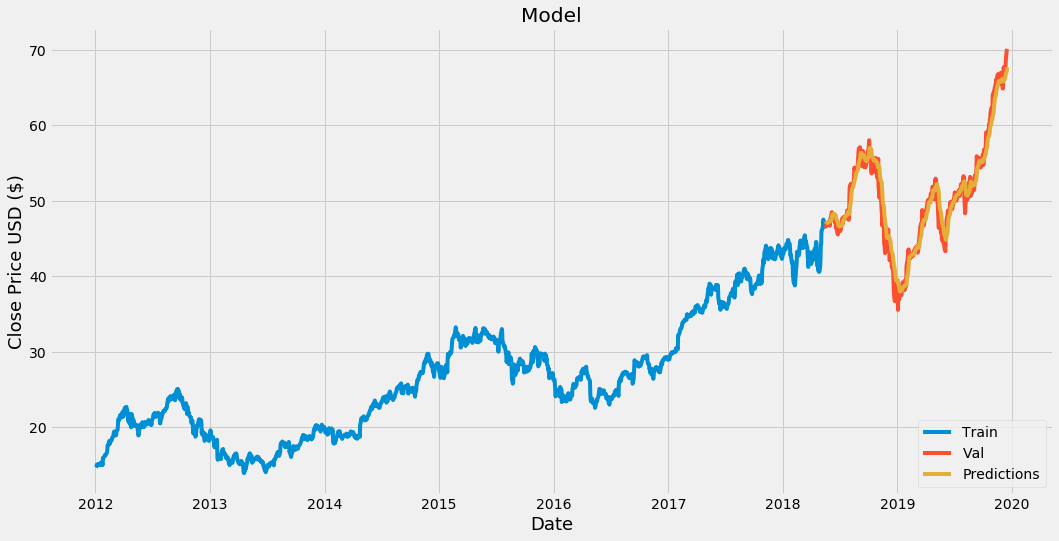

In [21]:
#Plot/Create the data for the graph
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [22]:
#Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2018-05-17,46.747501,46.947632
2018-05-18,46.577499,47.003696
2018-05-21,46.907501,47.005043
2018-05-22,46.790001,47.035820
2018-05-23,47.090000,47.057632
...,...,...
2019-12-11,67.692497,66.397575
2019-12-12,67.864998,66.622169
2019-12-13,68.787498,66.854126


In [24]:
#Get the quote
apple_quote = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2019-12-17')
#Create a new dataframe
new_df = apple_quote.filter(['Close'])
#Get teh last 60 day closing price 
last_60_days = new_df[-60:].values
#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test = []
#Append teh past 60 days
X_test.append(last_60_days_scaled)
#Convert the X_test data set to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling 
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)
#Image for post
#The predicted price for 12/18/2019
#Now let’s see what the actual price for that day was.
#Get the quote
apple_quote2 = web.DataReader('AAPL', data_source='yahoo', start='2019-12-18', end='2019-12-18')
print(apple_quote2['Close'])

[[68.15579]]
Date
2019-12-17    70.102501
2019-12-18    69.934998
Name: Close, dtype: float64
